<a href="https://colab.research.google.com/github/prachuryanath/TF-Learning/blob/main/02_neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification for problems.

* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles 
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand right now ... let's visualize it !

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


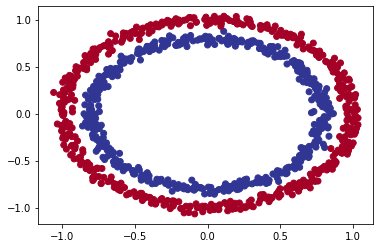

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap= plt.cm.RdYlBu);

### Input and Output shapes

In [ ]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are typically :
1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model

In [ ]:
import tensorflow as tf

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X,y, epochs=5)

Epoch 1/5
32/32 [==============================] - 3s 2ms/step - loss: 4.1198 - accuracy: 0.4378
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7207 - accuracy: 0.5530
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7033 - accuracy: 0.4836
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5180
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5157


In [ ]:
# Let's try and improve our model by fitting it for longer
model_1.fit(X,y, epochs=200, verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X,y, epochs=100, verbose=0)

# 4. Evaluate the model
model_2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.5000


[0.6942555904388428, 0.5]

## Improving our model

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(300, activation="relu"),
  tf.keras.layers.Dense(200, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1, activation="softmax")
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
history = model_3.fit(X,y, epochs=100, verbose=0)
model_3.summary()

# 4. Evaluate the model
model_3.evaluate(X,y)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 300)               900       
_________________________________________________________________
dense_4 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 81,301
Trainable params: 81,301
Non-trainable params: 0
_________________________________________________________________
32/32 [==============================] - 0s 2ms/step - loss: 2.9866e-04 - accuracy: 0.5000


[0.00029866292607039213, 0.5]

To visualize our model's predictions, let's create a function `plot_decision_boundary()`, this function will :

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the preditions as well as a line between zones (where each unique class falls)

In [ ]:
import numpy as np

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classifcation...


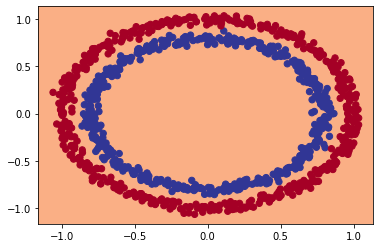

In [ ]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_1,
                       X=X,
                       y=y)

In [ ]:
# Let's see if our model can be used for a regression problem...

# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the data
model_3.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100


ValueError: ignored

Oh wait... we compiled our model for a binary classification problem.

But... we're now working on a regression problem, let's change the model to suit the data.

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(300, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(X_reg_train,y_reg_train, epochs=100, verbose=0)

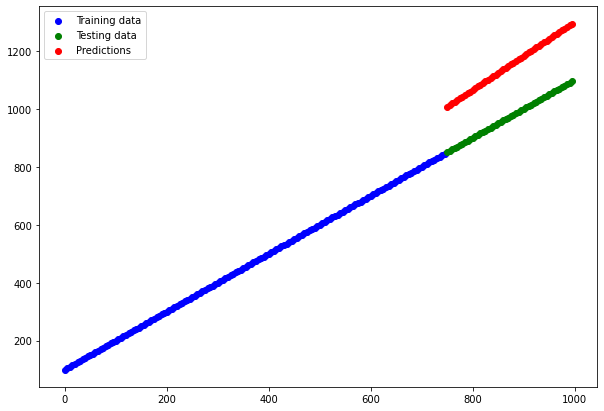

In [ ]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(y_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend();

## The missing piece: Non-linearity

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_4.fit(X,y, epochs=100, verbose=0)

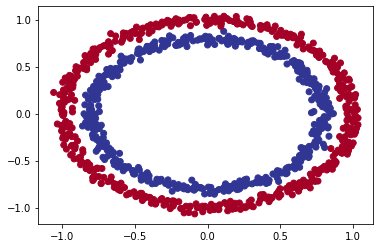

In [ ]:
# Check out our data
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

doing binary classifcation...


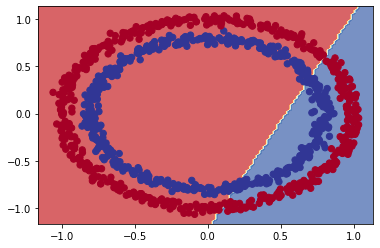

In [ ]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

Let's try build our first neural network with a non-linear actvation function

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_5.fit(X,y, epochs=100, verbose=0)

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu)
])

# 2. Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_6.fit(X,y, epochs=200, verbose=0)

In [ ]:
model_6.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.4710 - accuracy: 0.5290


[0.4709894061088562, 0.5289999842643738]

doing multiclass classification...


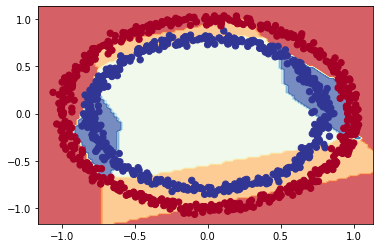

In [ ]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_6,
                       X=X,
                       y=y)

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid),
])

# 2. Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_7.fit(X,y, epochs=200, verbose=0)

In [ ]:
model_7.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0690 - accuracy: 0.9930


[0.06901050359010696, 0.9929999709129333]

doing binary classifcation...


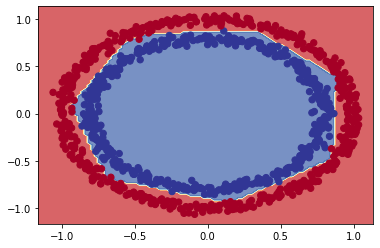

In [ ]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_7,
                       X=X,
                       y=y)

In [ ]:
# Create a toy A tensor
A = tf.cast(range(-10,10), tf.float32)

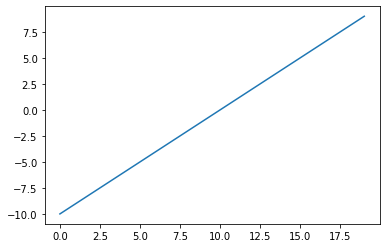

In [ ]:
plt.plot(A)

In [ ]:
# Let's start by replicating sigmoid
def sigmoid(x):
  return 1/(1+tf.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

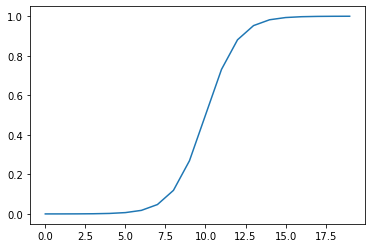

In [ ]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [ ]:
# Let's recreate the relu function
def relu(x):
  return tf.maximum(0, x)

# Pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

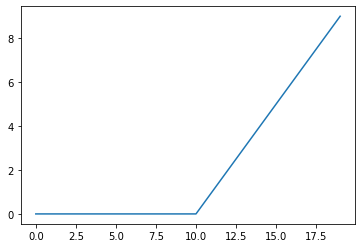

In [ ]:
# Plot our toy tensor transformed by relu
plt.plot(relu(A))

In [ ]:
# Let's try the linear activaton function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [ ]:
# Does A even change ?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving our classification

So far we've been training and testing on the test. So, let's create a training and test set

In [ ]:
# Check the number of examples
len(X)

1000

In [ ]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

In [ ]:
# Let'r recreate a model to fit on the training data and evaluate on the test data

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid),
])

# 2. Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"])

# 3. Fit the model
history = model_8.fit(X_train,y_train, epochs=25, verbose=0)

# 4. Evaluate the model
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000


[0.12468842417001724, 1.0]

doing binary classifcation...


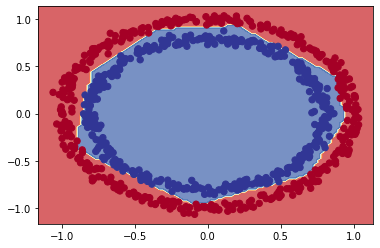

In [ ]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_8,
                       X=X_train,
                       y=y_train)

doing binary classifcation...


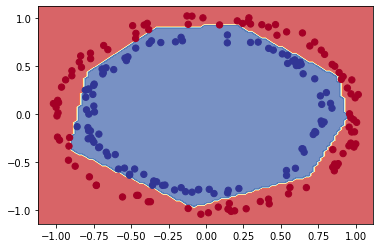

In [ ]:
plot_decision_boundary(model=model_8,
                       X=X_test,
                       y=y_test)

## Plot the loss(or training) curves

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673594,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
5,0.654567,0.58375
6,0.641257,0.67500
7,0.626428,0.70125
8,0.603831,0.74875
9,0.571403,0.77375


Text(0.5, 1.0, 'Model_8 loss curves')

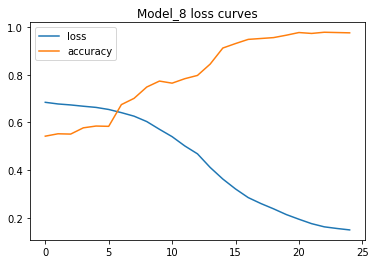

In [ ]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")

## Finding the best learning rate

To finf the ideal learning rate ( the learning rate where the loss decreases the most during training ) we're going to use the following steps :
* A learning rate **callback** : you can think of a callback as an extra piece of functionality, you can add to your *while* its training.
* Another model
* A modified loss curves plot.

In [ ]:
# Let'r recreate a model to fit on the training data and evaluate on the test data

# Set the random seed
tf.random.set_seed(42)

# Create the model using the Sequential API
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid),
])

# Compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4 *10**(epoch/20))

# Fit the model
history = model_9.fit(X_train,y_train, epochs=100, callbacks=[lr_scheduler])

# Evaluate the model
model_9.evaluate(X_test,y_test)

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6909 - accuracy: 0.5016
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5065
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5094
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4864
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6968 - accuracy: 0.4857
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5191
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6799 - accuracy: 0.5292
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6845 - accuracy: 0.5055
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.4750
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.4965
Epoch 11/

[0.6934390068054199, 0.4950000047683716]

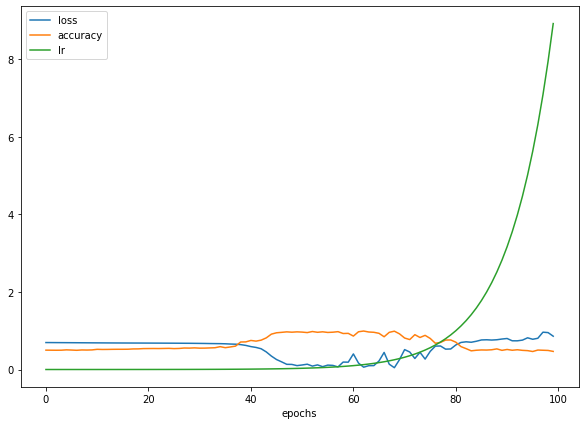

In [ ]:
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs")

Text(0.5, 1.0, 'Learning rate vs title')

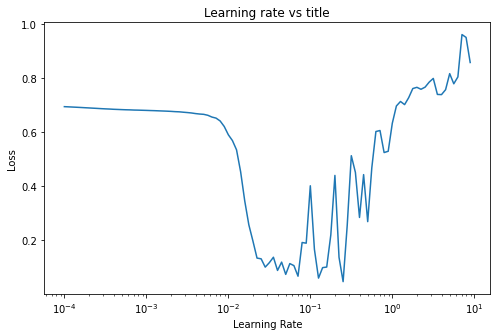

In [ ]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10** (tf.range(100)/20))
plt.figure(figsize=(8,5))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs title")

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid),
])

# 2. Compile the model
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.02),
                metrics=["accuracy"])

# 3. Fit the model
history = model_10.fit(X_train,y_train, epochs=20, verbose=0)

# 4. Evaluate the model
model_10.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900


[0.05740185081958771, 0.9900000095367432]

doing binary classifcation...
doing binary classifcation...


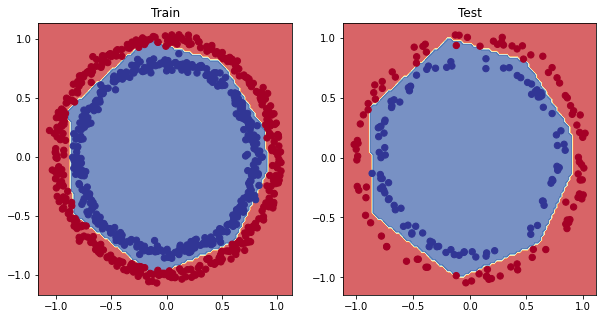

In [ ]:
# Plot the decision boundaries for the training and test data sets
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10,X=X_test,y=y_test)
plt.show()

## More classification evaluation methods

Alongside visualizing our model results as much as possible, there are a handful of other classification evaluaton methods and metrics you should be familiar with :
* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report(from sklearn)


In [ ]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {(loss):.5f}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900
Model loss on the test set: 0.05740
Model accuracy on the test set: 99.00%


### How about a confusion matrix ?

In [ ]:
# Create a confusion matrix 
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrx
confusion_matrix(y_test,y_preds)

ValueError: ignored

In [ ]:
y_test[:10]

In [ ]:
y_preds[:10]

Oops... looks like our prediction array has come out in **prediction probability** form... the standard output from the sigmoid(or softmax) activation functions

In [ ]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

In [ ]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

### How about we prettify our confusion matrix ?

In [ ]:
import itertools

figsize=(8,8)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis]   # Normalize our cm
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False
if classes:
  labels=classes
else:
  labels= np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(15)
ax.xaxis.label.set_size(15)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j,i, f"{cm[i,j]}({cm_norm[i,j]*100:.1f}%",
           horizontalalignment = "center",
           color="white" if cm[i,j]> threshold else "black",
           size=15)

# Working with a larger example (multiclass classificaton)

To practice multi-class classification, we're going to build a neural network to classify images of different items of clothing .

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

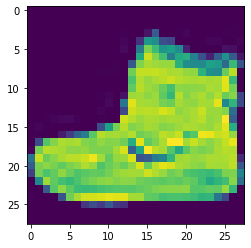

In [ ]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

In [ ]:
# Check out samples label
train_labels[7]

2

In [ ]:
# Create a small list so we can index onto our training labels so they're human-readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
len(class_names)

10

Text(0.5, 1.0, 'Ankle boot')

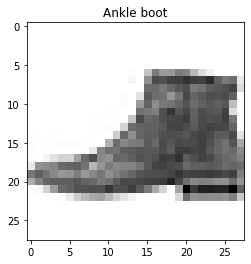

In [ ]:
# Plot an example image and its labels
index_of_choice = 1700
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

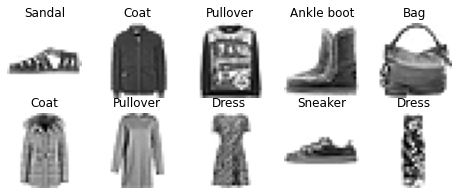

In [ ]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(8,8))
for i in range(10):
  ax = plt.subplot(5,5,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multi-class classification model

For our model, we can use a similar architecture to our binary classifiers, however, we're going to have to tweak a few things :
* Input shape = 28 x 28 (the shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
  * If your labels are one-hot encoded, use CategoricalCrossentropy()
  * If your labels are integer form use SparseCategoricalCrossentropy()
* Output layer activation = Softmax (not sigmoid)

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax"),
])

# 2. Compile the model
model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
non_norm_history = model_11.fit(train_data,
                                tf.one_hot(train_labels,depth=10),
                                epochs=10,
                                validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.8251 - accuracy: 0.1333 - val_loss: 1.8075 - val_accuracy: 0.2064
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7467 - accuracy: 0.2279 - val_loss: 1.6509 - val_accuracy: 0.2824
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6495 - accuracy: 0.2819 - val_loss: 1.6052 - val_accuracy: 0.3025
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6095 - accuracy: 0.2867 - val_loss: 1.6011 - val_accuracy: 0.2986
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6079 - accuracy: 0.2936 - val_loss: 1.5992 - val_accuracy: 0.3195
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5938 - accuracy: 0.3074 - val_loss: 1.5662 - val_accuracy: 0.3144
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5845 - accuracy: 0.3174 - val_loss: 1.5740 - val_accuracy:

In [ ]:
# Check the model summary
model_11.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_27 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_28 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled(or normalized), this means they like to have the numbers in the tensors between 0 and 1.

In [ ]:
# We can get our training and testing data between 0 & 1 by dividing by the maximum
train_data_norm = train_data /255.0
test_data_norm = test_data /255.0

train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax"),
])

# 2. Compile the model
model_12.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
norm_history = model_12.fit(train_data_norm,
                                tf.one_hot(train_labels,depth=10),
                                epochs=10,
                                validation_data=(test_data_norm, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4476 - accuracy: 0.5004 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6479 - accuracy: 0.7706 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5984 - accuracy: 0.7902 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5767 - accuracy: 0.7986 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5611 - accuracy: 0.8017 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5562 - accuracy: 0.8030 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5458 - accuracy: 0.8076 - val_loss: 0.6097 - val_accuracy:

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax"),
])

# 2. Compile the model
model_13.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
norm_history_2 = model_13.fit(train_data_norm,
                                tf.one_hot(train_labels,depth=10),
                                epochs=10,
                                validation_data=(test_data_norm, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6204 - accuracy: 0.7815 - val_loss: 0.4035 - val_accuracy: 0.8547
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3606 - accuracy: 0.8671 - val_loss: 0.4262 - val_accuracy: 0.8529
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3328 - accuracy: 0.8752 - val_loss: 0.3682 - val_accuracy: 0.8657
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3022 - accuracy: 0.8891 - val_loss: 0.3712 - val_accuracy: 0.8681
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2909 - accuracy: 0.8901 - val_loss: 0.3494 - val_accuracy: 0.8732
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2723 - accuracy: 0.8976 - val_loss: 0.3519 - val_accuracy: 0.8700
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2575 - accuracy: 0.9028 - val_loss: 0.3731 - val_accuracy:

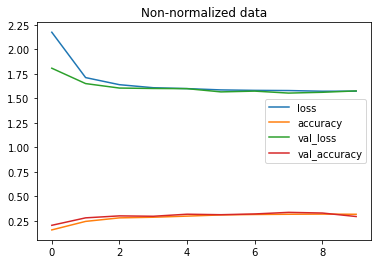

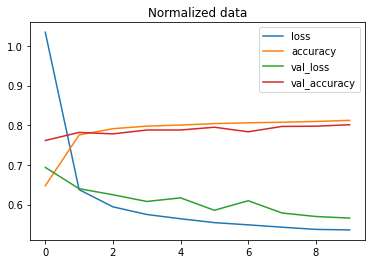

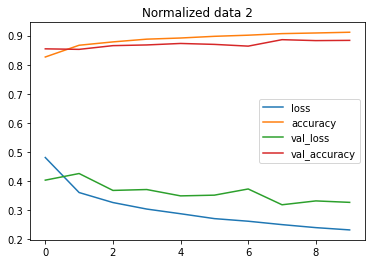

In [ ]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")
pd.DataFrame(norm_history_2.history).plot(title="Normalized data 2")

## Finding the ideal learning rate

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model using the Sequential API
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(128, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax),
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3 *10**(epoch/20))

# Fit the model
find_lr_history = model_14.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               callbacks=[lr_scheduler],
                               validation_data=(test_data_norm,test_labels))

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6232 - accuracy: 0.7845 - val_loss: 0.4185 - val_accuracy: 0.8481
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3813 - accuracy: 0.8619 - val_loss: 0.4478 - val_accuracy: 0.8464
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3485 - accuracy: 0.8713 - val_loss: 0.3857 - val_accuracy: 0.8554
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3227 - accuracy: 0.8835 - val_loss: 0.3982 - val_accuracy: 0.8560
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3125 - accuracy: 0.8834 - val_loss: 0.3685 - val_accuracy: 0.8661
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3001 - accuracy: 0.8904 - val_loss: 0.3974 - val_accuracy: 0.8531
Epoch 7/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2868 - accuracy: 0.8928 - val_loss: 0.3792 - val_accuracy:

Text(0.5, 1.0, 'Finding the ideal learning rate')

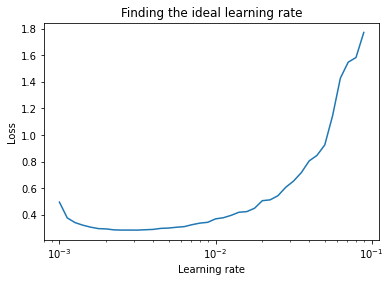

In [ ]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model using the Sequential API
model_15 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(128, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax),
])

# Compile the model
model_15.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# Fit the model
history_14 = model_15.fit(train_data_norm,
                               train_labels,
                               epochs=20,
                               validation_data=(test_data_norm,test_labels))

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6232 - accuracy: 0.7845 - val_loss: 0.4185 - val_accuracy: 0.8481
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3781 - accuracy: 0.8632 - val_loss: 0.4491 - val_accuracy: 0.8467
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3429 - accuracy: 0.8737 - val_loss: 0.3874 - val_accuracy: 0.8555
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3104 - accuracy: 0.8872 - val_loss: 0.3737 - val_accuracy: 0.8642
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2966 - accuracy: 0.8893 - val_loss: 0.3629 - val_accuracy: 0.8690
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2789 - accuracy: 0.8973 - val_loss: 0.3695 - val_accuracy: 0.8655
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2614 - accuracy: 0.9026 - val_loss: 0.3533 - val_accuracy:

## Evaluating our multi-class classification model

To evaluate our multi-class classication model we could :
* Evaluate its performance using other classification metrics (such as a confusion matrix)
* Assess some of its predictions (through visualizations)
* Improve its results (by training it for longer or changing the architecture)
* Save and export it for use in an application

Let's go through the top 2....

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true,y_pred, classes=None, figsize=(8,8), text_size=15):
  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis]   # Normalize our cm
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
    labels=classes
  else:
    labels= np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, f"{cm[i,j]}({cm_norm[i,j]*100:.1f}%",
            horizontalalignment = "center",
            color="white" if cm[i,j]> threshold else "black",
            size=text_size)

In [ ]:
# Make some predictions with our model
y_probs = model_15.predict(test_data_norm)    # Prediction on normalized data as model is on normalized train data

# View the first 5 predictions
y_probs[:5]

array([[1.12000222e-07, 1.76992934e-15, 6.89703461e-10, 5.62301670e-13,
        9.19181509e-10, 1.00368788e-05, 1.51214926e-11, 4.15677205e-03,
        2.10184634e-08, 9.95833099e-01],
       [5.59432156e-05, 1.37382117e-13, 9.99399900e-01, 4.50634515e-18,
        5.43707400e-04, 2.50688665e-18, 3.62922975e-07, 2.16759949e-28,
        6.61902051e-17, 1.75640830e-19],
       [1.56108511e-15, 1.00000000e+00, 2.25604499e-16, 1.07084304e-13,
        1.50146578e-13, 5.81620674e-27, 2.56735788e-14, 3.86670121e-30,
        1.01831679e-21, 4.09808251e-29],
       [1.82198332e-12, 1.00000000e+00, 9.00878493e-15, 1.82863213e-09,
        2.65479669e-11, 9.33654772e-22, 2.67607936e-10, 1.85144152e-27,
        1.58372645e-17, 2.64937918e-26],
       [2.89262146e-01, 5.99733414e-12, 3.59929563e-03, 7.90870308e-06,
        2.02983247e-05, 1.44180512e-09, 7.07110226e-01, 4.78181121e-08,
        1.48310866e-08, 4.75560650e-12]], dtype=float32)

In [ ]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([1.1200022e-07, 1.7699293e-15, 6.8970346e-10, 5.6230167e-13,
        9.1918151e-10, 1.0036879e-05, 1.5121493e-11, 4.1567720e-03,
        2.1018463e-08, 9.9583310e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [ ]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[829,   4,  18,  18,   7,   0, 115,   0,   9,   0],
       [  3, 983,   1,   8,   4,   0,   1,   0,   0,   0],
       [ 14,   1, 769,   6, 166,   0,  42,   0,   2,   0],
       [ 24,   6,  13, 864,  66,   0,  23,   0,   4,   0],
       [  0,   0,  60,   9, 904,   0,  26,   0,   1,   0],
       [  2,   0,   0,   1,   0, 931,   0,  36,   1,  29],
       [120,   0,  94,  23, 141,   0, 615,   0,   7,   0],
       [  0,   0,   0,   0,   0,   6,   0, 981,   0,  13],
       [  4,   0,   3,   4,   9,   1,   4,   4, 971,   0],
       [  0,   0,   0,   0,   0,   1,   1,  61,   0, 937]])

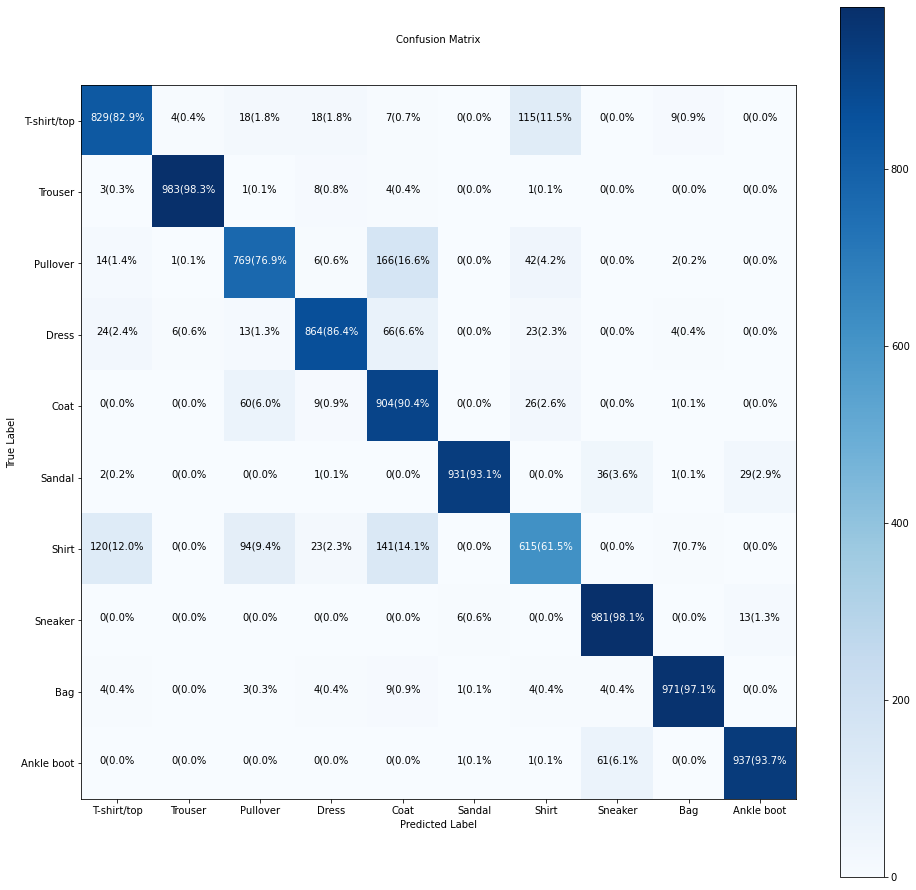

In [ ]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(16,16),
                      text_size=10)

How about we create a fun little function for :
* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label & the predicted label

In [ ]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label
  """
  # Set up random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"
  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred:{} {:2.0f}% (True:{})".format(pred_label,
                                                 100*tf.reduce_max(pred_probs),
                                                 true_label),
             color=color)

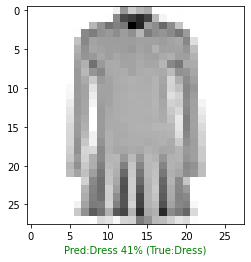

In [ ]:
# Check out a random image as well as its prediction
plot_random_image(model=model_15,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)